## 고객데이터 분석
Bank Marketing Data Set : https://archive.ics.uci.edu/ml/datasets/bank+marketing

#### 예제 데이터 개요
- 41188개 행, 21개 칼럼
- 은행에서 진행된 마케팅 캠페인 
- 텔레마케팅으로 상품 가입 권유

|순서|칼럼명|설명|
|:--|:--|:--|
||# 은행 고객데이터|
|1	|age	|나이|
|2	|job	|직업|
|3	|marital	|결혼여부|
|4	|education	|교육수준|
|5	|default	|파산여부|
|6	|housing	|주택 대출여부|
|7	|loan	|개인 대출여부|
||# 현재 캠페인의 마지막 연락과 관련된 데이터|
|8	|contact	|고객과 접촉한 기기의 유형|
|9	|month	|가장 최근 고객과 연락한 달|
|10	|day_of_week	|가장 최근 고객과 연락한 요일|
|11	|duration	|가장 최근 고객과 연락했을 때의 통화시간|
||# 기타 다른 데이터|
|12	|campaign	|이번 마케팅 캠페인으로 고객과 연락한 횟 수|
|13	|pdays	|이전 마케팅 캠페인으로 고객과 연락 후 경과된 일 수|
|14	|previous	|이전 마케팅 캠페인으로 고객과 연락한 횟수|
|15	|poutcome	|이전 마케팅 캠페인의 결과| 
||# 사회적, 경제적 맥락의 데이터|
|16	|emp.var.rate	|고용 변동율|
|17	|cons.price.idx	|소비자 물가지수|
|18	|cons.conf.idx	|소비자 신뢰지수|
|19	|euribor3m	|유로존에서 은행간 적용되는 3개월간의이자율| 
|20	|nr.employed	|취업자 수 |
||# 결과 데이터|
|21	|y	|상품 가입 여부| 

#### 예제 데이터 가져오기

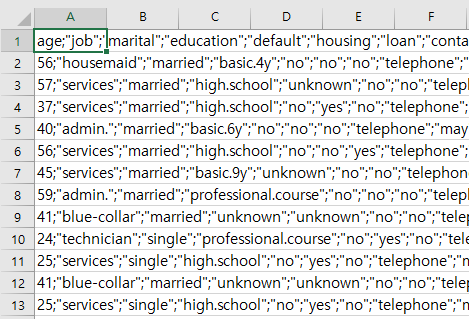
- 세미 콜론으로 데이터가 구분된 CSV파일

In [1]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

import matplotlib.pyplot as plt

In [2]:
pwd

'C:\\Users\\pomel\\Documents\\bootcamp\\practice'

In [3]:
# 세미 콜론으로 데이터가 구분되어 있어서 sep 매개변수로 구분자 지정하여 csv 파일 가져오기
df=pd.read_csv('bank-additional-full.csv',sep=';')

In [4]:
# ‘Initializing from file failed’ 에러 발생시 engine 매개변수 사용
df=pd.read_csv('bank-additional-full.csv',sep=';', engine='python')

### 데이터 탐색

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [7]:
# 데이터의 결측치 여부 확인 
df.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41184,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41185,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
41186,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# 열 기준으로 결측치 확인
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# 데이터의 구조
# 칼럼명, 데이터의 수, 결측값 존재여부, 판다스의 데이터타입
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.shape

(41188, 21)

In [11]:
df.index

RangeIndex(start=0, stop=41188, step=1)

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
# 칼럼별 요약통계량 추출
# 데이터의 개수, 평균, 표준편차, 최소값, 1/4분위수, 2/4분위수, 3/4분위수, 최대값
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### unique함수
- 시리즈의 value를 구성하는 고유값 출력

In [14]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [16]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

#### value_counts함수
- 고유값의 빈도 출력

In [17]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [18]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [19]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

#### sort_values함수
- 정렬(기본값 : 오름차순)

In [20]:
df['age'].sort_values()

38274    17
37579    17
37539    17
37140    17
37558    17
         ..
40450    92
38921    94
27826    95
38455    98
38452    98
Name: age, Length: 41188, dtype: int64

In [21]:
# 내림차순
df['age'].sort_values(ascending=False)

38452    98
38455    98
27826    95
38921    94
39655    92
         ..
37579    17
37539    17
38274    17
37140    17
37558    17
Name: age, Length: 41188, dtype: int64

In [22]:
df['duration'].sort_values()

33015       0
23031       0
28063       0
6251        0
28239       1
         ... 
7727     3631
13820    3643
40537    3785
22192    4199
24091    4918
Name: duration, Length: 41188, dtype: int64

## 데이터 시각화
#### 고객 연령대별 히스토그램    
  - 연령데이터( df['age'] ) 

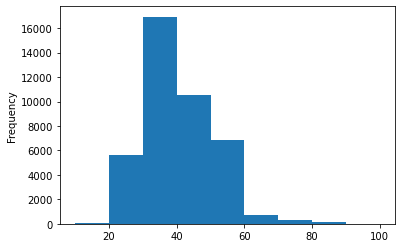

In [23]:
# 연령대를 반영하는 계급구간(bins) 설정
df['age'].plot(kind='hist',bins=[10,20,30,40,50,60,70,80,90,100])
plt.show()

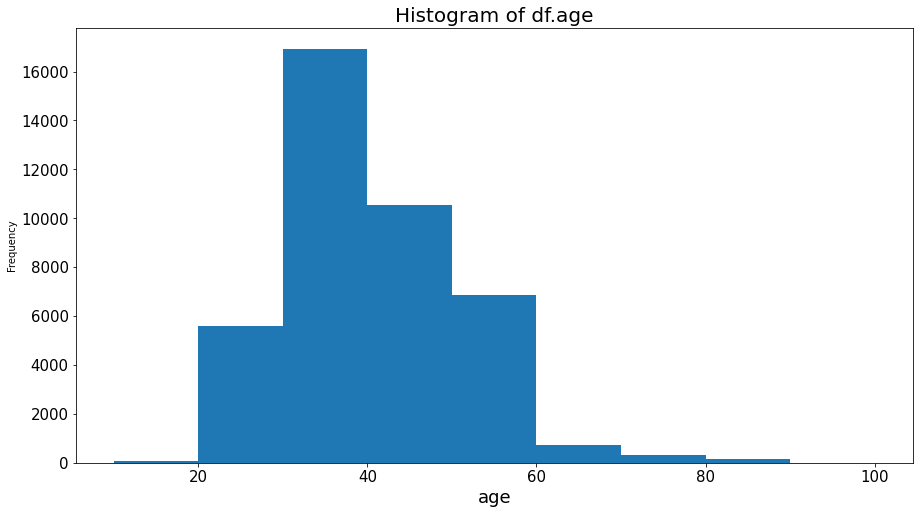

In [24]:
# 옵션 추가하여 히스토그램 그리기
df['age'].plot(kind='hist',bins=[10,20,30,40,50,60,70,80,90,100],figsize=[15,8])
plt.title('Histogram of df.age',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age',fontsize=18)
plt.show()

#### 통화시간별 히스토그램    
  - 전화통화시간( df['duration'] )  
  - 통화시간별 구간설정(임의)

In [25]:
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

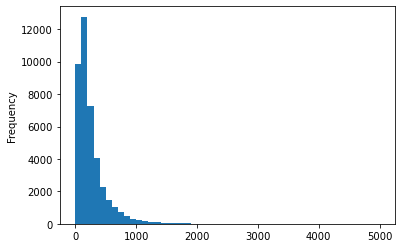

In [26]:
# 계급구간(bins) 설정
# 전체 통화시간의 범위 0 - 5000
# 계급구간의 크기 - 100
df['duration'].plot(kind='hist',bins=range(0,5001,100))
plt.show()

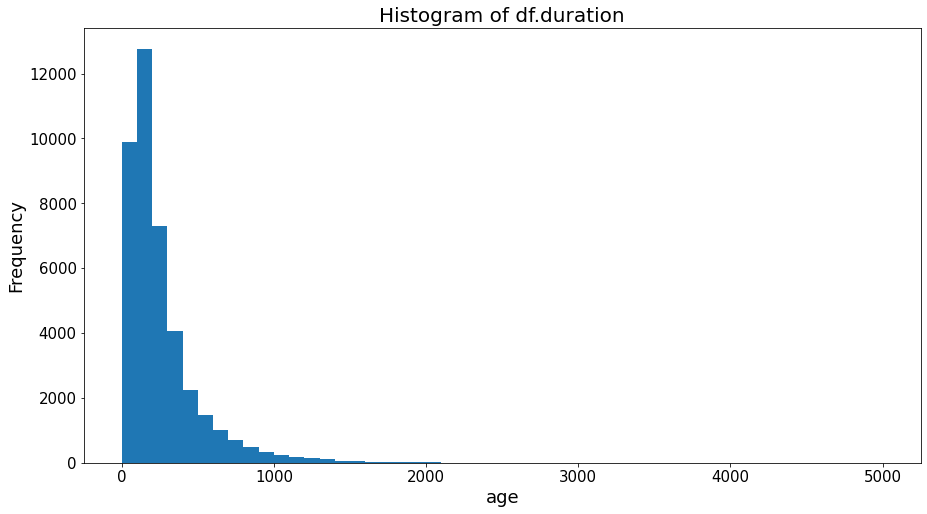

In [27]:
df['duration'].plot(kind='hist',bins=range(0,5001,100), figsize=[15,8])
plt.title('Histogram of df.duration',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age',fontsize=18)
plt.ylabel('Frequency',fontsize=18)
plt.show()

#### 직업군별 막대그래프
  - 고객 직업군(df['job'])    

In [28]:
# job칼럼의 각각의 데이터는 문자열
# 그래프를 그리기 위한 수치화 필요
# 직업별 빈도
job=df['education'].value_counts()

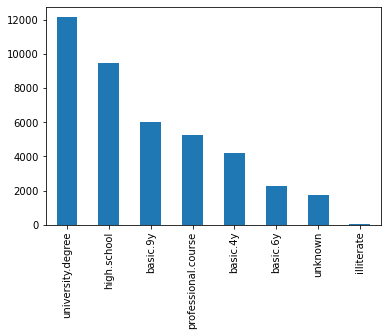

In [29]:
# 직업군별 막대그래프
job.plot(kind='bar')
plt.show()

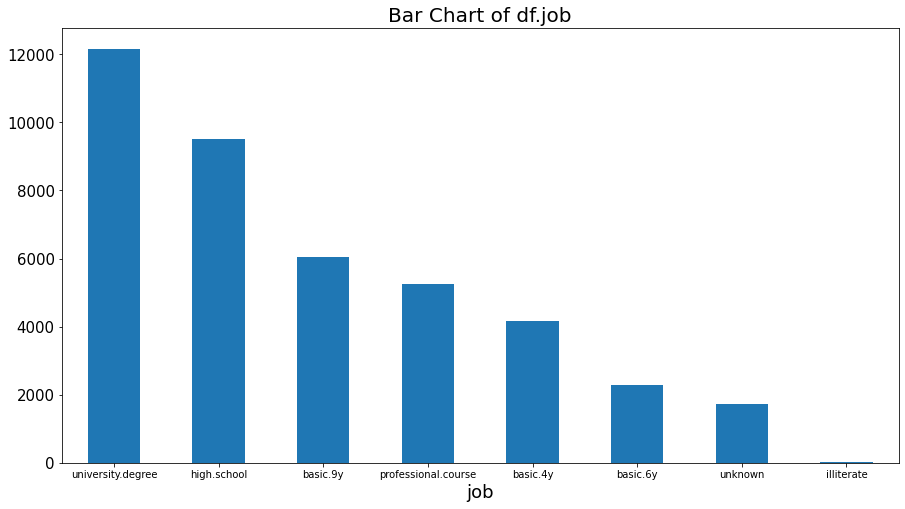

In [30]:
job.plot(kind='bar', figsize=[15,8])
plt.title('Bar Chart of df.job',fontsize=20)
plt.xticks(fontsize=10,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('job',fontsize=18)
plt.show()

#### 요일별 통화건수 막대그래프
  - 가장 최근 고객과 연락한 요일 ( df['day_of_week'] )    

In [31]:
# day_of_week칼럼의 각각의 데이터는 문자열
# 그래프를 그리기 위한 수치화
# 요일별 빈도
day_of_week=df['day_of_week'].value_counts()

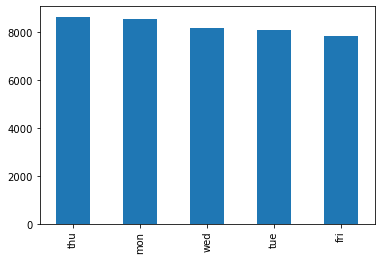

In [32]:
# 요일별 통화건수 막대그래프
day_of_week.plot(kind='bar')
plt.show()

In [33]:
# 요일별 순서정렬
# 시리즈의 reindex함수 : index 재정렬(추가/제외)
day_of_week2=day_of_week.reindex(['mon','tue','wed','thu','fri'])

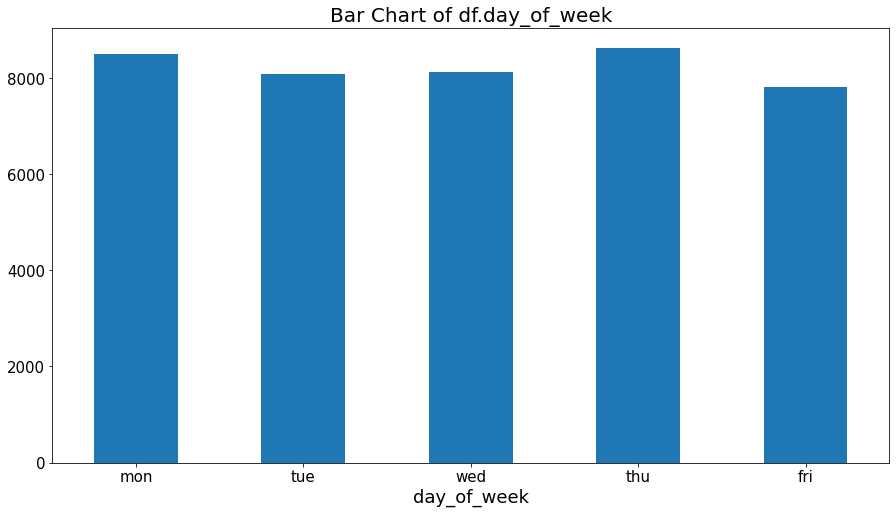

In [34]:
day_of_week2.plot(kind='bar', figsize=[15,8])
plt.title('Bar Chart of df.day_of_week',fontsize=20)
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('day_of_week',fontsize=18)
plt.show()

## 데이터 분석

#### 분석주제 #1. 직업별 고객현황

__판다스의 groupby함수__
- 전체 데이터를 지정된 칼럼을 기준으로 그룹화하는 함수

#### groupby 함수의 용도 
#1. 그룹별 기술통계량 추출 

In [35]:
grouped=df.groupby('y')

In [36]:
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

In [37]:
# y칼럼을 기준으로 데이터가 그룹화
# 기타 칼럼이 sum함수로 집계
grouped.sum()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,1458674,8071436,96234,35967394,4838,9095.9,3.421030e+06,-1483596.5,139302.379,1.891785e+08
yes,189837,2566807,9520,3675045,2286,-5723.2,4.331644e+05,-184624.6,9851.347,2.364134e+07


In [38]:
grouped.mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [39]:
grouped.min()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,0,1,0,0,failure,-3.4,92.201,-50.8,0.634,4963.6
yes,17,admin.,divorced,basic.4y,no,no,no,cellular,apr,fri,37,1,0,0,failure,-3.4,92.201,-50.8,0.634,4963.6


In [40]:
grouped.max()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,95,unknown,unknown,unknown,yes,yes,yes,telephone,sep,wed,4918,56,999,7,success,1.4,94.767,-26.9,5.045,5228.1
yes,98,unknown,unknown,unknown,unknown,yes,yes,telephone,sep,wed,4199,23,999,6,success,1.4,94.767,-26.9,5.045,5228.1


In [41]:
grouped.std()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
yes,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641


In [42]:
grouped.var()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,97.973013,42888.874702,8.256647,14558.079734,0.167444,2.199086,0.312473,19.282238,2.683658,4169.540468
yes,191.475749,160938.869894,2.776371,162737.353553,0.740192,2.636161,0.457847,37.695520,3.036648,7668.967371


In [43]:
grouped.median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [44]:
grouped.quantile()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [45]:
# 데이터의 수 
grouped.count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


In [46]:
# 데이터의 수 
grouped.size()

y
no     36548
yes     4640
dtype: int64

※ groupby의 count와 size 함수 비교
1. 반환하는 형태
    - count : 데이터프레임 혹은 시리즈
    - size : 시리즈
2. 결측치
    - count : 반영
    - size : 미반영

In [47]:
# 예제 데이터
# col1 :NaN이 있는 칼럼
data={'col1':[None,1,2,3],'col2':['가','가','나','나']}
df_ex=DataFrame(data)
df_ex

,col1,col2
0,NaN,가
1,1.0,가
2,2.0,나
3,3.0,나


In [48]:
grouped_ex=df_ex.groupby('col2')

In [49]:
# 가 그룹의 데이터 : 1개
# 나 그룹의 데이터 : 2개
grouped_ex.count()

,col1
col2,
가,1
나,2


In [50]:
# 가 그룹의 데이터 : 2개
# 나 그룹의 데이터 : 2개
grouped_ex.size()

col2
가    2
나    2
dtype: int64

#### groupby 함수의 용도 
#2. 특정 고유값이 있는 데이터만 추출  
- get_group(고유값)

In [51]:
grouped=df.groupby('y')

In [52]:
grouped.get_group('yes')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [53]:
grouped.get_group('no')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


#### 분석주제 #1. 직업별 고객 현황(groupby)

In [54]:
grouped=df.groupby('job')

In [55]:
grouped.size()

job
admin.           10422
blue-collar       9254
entrepreneur      1456
housemaid         1060
management        2924
retired           1720
self-employed     1421
services          3969
student            875
technician        6743
unemployed        1014
unknown            330
dtype: int64

In [56]:
# 직업별 비율
# size함수의 결과값은 시리즈 자료구조
grouped.size()/grouped.size().sum()

job
admin.           0.253035
blue-collar      0.224677
entrepreneur     0.035350
housemaid        0.025736
management       0.070992
retired          0.041760
self-employed    0.034500
services         0.096363
student          0.021244
technician       0.163713
unemployed       0.024619
unknown          0.008012
dtype: float64

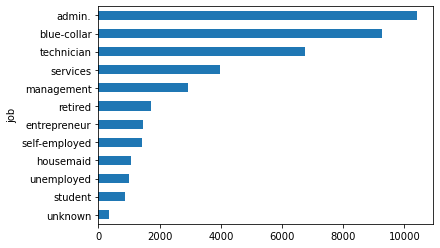

In [57]:
# 시각화
grouped.size().sort_values().plot(kind='barh')
plt.show()

#### 분석주제 #2. 요일별 가입자-비가입자 수 통계

In [58]:
grouped=df.groupby('y')

In [59]:
# 가입-비가입여부에 따른 데이터프레임 추출
df_y_group=grouped.get_group('yes')
df_n_group=grouped.get_group('no')

In [60]:
# 가입한 고객의 데이터프레임
df_y_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [61]:
# 가입하지 않은 고객의 데이터프레임
df_n_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [62]:
# 각각의 데이터프레임에 대하여 요일별로 그룹화
df_y_day=df_y_group.groupby('day_of_week')
df_n_day=df_n_group.groupby('day_of_week')

In [63]:
# 가입자 수 통계(size함수)
df_y_day.size()

day_of_week
fri     846
mon     847
thu    1045
tue     953
wed     949
dtype: int64

In [64]:
# 비가입자 수 통계(size함수)
df_n_day.size()

day_of_week
fri    6981
mon    7667
thu    7578
tue    7137
wed    7185
dtype: int64

In [65]:
# 요일별 가입자의 비율
y_size=df_y_day.size()/df_y_day.size().sum()
y_size

day_of_week
fri    0.182328
mon    0.182543
thu    0.225216
tue    0.205388
wed    0.204526
dtype: float64

In [66]:
# 요일별 비가입자의 비율
n_size=df_n_day.size()/df_n_day.size().sum()
n_size

day_of_week
fri    0.191009
mon    0.209779
thu    0.207344
tue    0.195277
wed    0.196591
dtype: float64

In [67]:
# 요일별 순서정렬
y_result=y_size.reindex(['mon','tue','wed','thu','fri'])
n_result=n_size.reindex(['mon','tue','wed','thu','fri'])

In [68]:
y_result

day_of_week
mon    0.182543
tue    0.205388
wed    0.204526
thu    0.225216
fri    0.182328
dtype: float64

In [69]:
n_result

day_of_week
mon    0.209779
tue    0.195277
wed    0.196591
thu    0.207344
fri    0.191009
dtype: float64

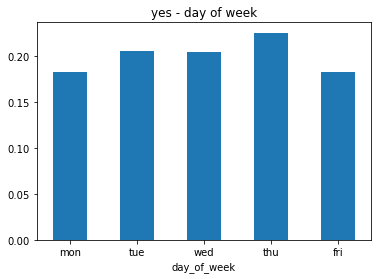

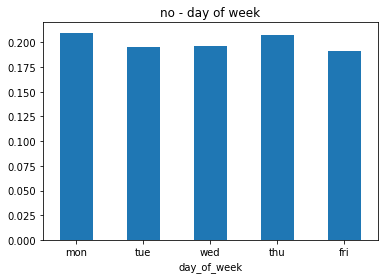

In [70]:
# 요일별 가입자 - 비가입자 수 시각화
y_result.plot(kind='bar')
plt.title('yes - day of week')
plt.xticks(rotation=0)
plt.show()

n_result.plot(kind='bar')
plt.title('no - day of week')
plt.xticks(rotation=0)
plt.show()

#### 분석주제 #3. 가입여부에 따른 평균 컨택횟수 비교

In [71]:
grouped=df.groupby('y')

In [72]:
# 가입-비가입여부에 따른 데이터프레임 추출
df_y_group=grouped.get_group('yes')
df_n_group=grouped.get_group('no')

In [73]:
df_y_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


In [74]:
df_n_group.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [75]:
# 평균컨택횟수 비교 
# campaign칼럼 : 컨택횟수
# Series의 집계함수 - mean
df_y_group['campaign'].mean()

2.0517241379310347

In [76]:
df_n_group['campaign'].mean()

2.6330852577432418

#### 분석주제 #4. 연령대별 고객 통계

#### cut 함수 : 
데이터의 최소값, 최대값에 기반하여 동일한 크기의 구간을 만들고, 각각의 데이터를 구간별로 분류

In [77]:
# 예제 데이터
data=Series(list(range(0,10)))
data

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [78]:
# pd.cut(나눌 데이터, 구간의 개수)
# 5개의 구간이 자동으로 생성
# 각각의 데이터가 어느 구간에 속하는지 표현
pd.cut(data,5)

0    (-0.009, 1.8]
1    (-0.009, 1.8]
2       (1.8, 3.6]
3       (1.8, 3.6]
4       (3.6, 5.4]
5       (3.6, 5.4]
6       (5.4, 7.2]
7       (5.4, 7.2]
8       (7.2, 9.0]
9       (7.2, 9.0]
dtype: category
Categories (5, interval[float64]): [(-0.009, 1.8] < (1.8, 3.6] < (3.6, 5.4] < (5.4, 7.2] < (7.2, 9.0]]

In [79]:
# 구간 별 데이터의 수 
pd.cut(data,5).value_counts()

(-0.009, 1.8]    2
(1.8, 3.6]       2
(3.6, 5.4]       2
(5.4, 7.2]       2
(7.2, 9.0]       2
dtype: int64

In [80]:
# 구간별 이름 설정
pd.cut(data,5,labels=['1구간','2구간','3구간','4구간','5구간'])

0    1구간
1    1구간
2    2구간
3    2구간
4    3구간
5    3구간
6    4구간
7    4구간
8    5구간
9    5구간
dtype: category
Categories (5, object): ['1구간' < '2구간' < '3구간' < '4구간' < '5구간']

In [81]:
# 구간별 이름 설정 및 구간 별 데이터의 수 
pd.cut(data,5,labels=['1구간','2구간','3구간','4구간','5구간']).value_counts()

1구간    2
2구간    2
3구간    2
4구간    2
5구간    2
dtype: int64

#### ※ 구간의 범위 임의 설정
 - pd.cut(나눌 데이터, 구간의 범위)

In [82]:
# 예제 데이터
data=Series(list(range(0,10)))
data

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [83]:
# 구간의 범위 설정
bins=[0,2,4,6,8,10]

In [84]:
pd.cut(data,bins)

# 괄호쪽에 있는 숫자는 미포함, 대괄호쪽에 있는 숫자는 포함
# 0<구간<=2
# 2<구간<=4
# 4<구간<=6
# 6<구간<=8
# 8<구간<=10

0            NaN
1     (0.0, 2.0]
2     (0.0, 2.0]
3     (2.0, 4.0]
4     (2.0, 4.0]
5     (4.0, 6.0]
6     (4.0, 6.0]
7     (6.0, 8.0]
8     (6.0, 8.0]
9    (8.0, 10.0]
dtype: category
Categories (5, interval[int64]): [(0, 2] < (2, 4] < (4, 6] < (6, 8] < (8, 10]]

#### 구간별 분류 도식화
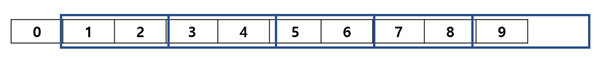

In [85]:
# right=False => 괄호와 대괄호의 위치 변경
# 0<=구간<2
# 2<=구간<4
# 4<=구간<6
# 6<=구간<8
# 8<=구간<10
pd.cut(data,bins,right=False)

0     [0, 2)
1     [0, 2)
2     [2, 4)
3     [2, 4)
4     [4, 6)
5     [4, 6)
6     [6, 8)
7     [6, 8)
8    [8, 10)
9    [8, 10)
dtype: category
Categories (5, interval[int64]): [[0, 2) < [2, 4) < [4, 6) < [6, 8) < [8, 10)]

#### 구간별 분류 도식화
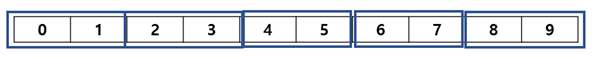

#### ※ qcut함수
- 구간별 데이터의 크기가 동일하도록 분류

In [86]:
# 예제 데이터
# random 모듈 : random한 숫자를 다루는 모듈
# randint : 입력된 범위(최소<=범위<=최대)에서 하나의 정수를 반환하는 함수

import random

data2=[]
for x in range(0,12):
    data2.append(random.randint(1,100))

In [87]:
data2=Series(data2)

In [88]:
# pd.qcut(나눌 데이터, 구간의 개수)
pd.qcut(data2,3)

0     (22.333, 38.333]
1      (4.999, 22.333]
2      (4.999, 22.333]
3       (38.333, 80.0]
4     (22.333, 38.333]
5      (4.999, 22.333]
6     (22.333, 38.333]
7      (4.999, 22.333]
8       (38.333, 80.0]
9     (22.333, 38.333]
10      (38.333, 80.0]
11      (38.333, 80.0]
dtype: category
Categories (3, interval[float64]): [(4.999, 22.333] < (22.333, 38.333] < (38.333, 80.0]]

In [89]:
# qcut : 구간별 데이터의 크기가 동일
pd.qcut(data2,3).value_counts()

(4.999, 22.333]     4
(22.333, 38.333]    4
(38.333, 80.0]      4
dtype: int64

In [90]:
# cut : 구간의 크기가 동일
pd.cut(data2,3).value_counts()

(4.925, 30.0]    5
(30.0, 55.0]     4
(55.0, 80.0]     3
dtype: int64

#### 분석주제 #4. 연령대별 고객 통계

In [91]:
# cut함수 사용 - 구간의 범위 임의 설정(연령대별)
bins=list(range(10,101,10))
bins

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [92]:
# pd.cut(나눌 데이터, 구간의 범위)
# age칼럼의 각각의 데이터가 어느 구간에 속해있는지 출력
pd.cut(df['age'],bins)

# 괄호쪽에 있는 숫자는 미포함, 대괄호쪽에 있는 숫자는 포함
# 설정되어 있는 구간의 범위(# 10< 10대 <=20)가 
# 일반적인 연령대 구분의 기준(# 10<= 10대 <20)과 상이

0        (50, 60]
1        (50, 60]
2        (30, 40]
3        (30, 40]
4        (50, 60]
           ...   
41183    (70, 80]
41184    (40, 50]
41185    (50, 60]
41186    (40, 50]
41187    (70, 80]
Name: age, Length: 41188, dtype: category
Categories (9, interval[int64]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] ... (60, 70] < (70, 80] < (80, 90] < (90, 100]]

In [93]:
pd.cut(df['age'],bins,right=False)

0        [50, 60)
1        [50, 60)
2        [30, 40)
3        [40, 50)
4        [50, 60)
           ...   
41183    [70, 80)
41184    [40, 50)
41185    [50, 60)
41186    [40, 50)
41187    [70, 80)
Name: age, Length: 41188, dtype: category
Categories (9, interval[int64]): [[10, 20) < [20, 30) < [30, 40) < [40, 50) ... [60, 70) < [70, 80) < [80, 90) < [90, 100)]

In [94]:
# 구간별 이름 설정
ages=['10s','20s','30s','40s','50s','60s','70s','80s','90s']

In [95]:
# 연령대별 고객 통계
pd.cut(df['age'],bins,right=False,labels=ages).value_counts()

30s    16938
40s    10526
50s     6862
20s     5594
60s      724
70s      319
80s      140
10s       75
90s       10
Name: age, dtype: int64

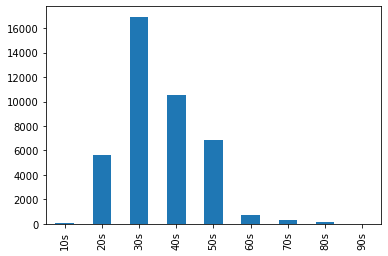

In [96]:
pd.cut(df['age'],bins,
       right=False,
       labels=ages).value_counts().sort_index().plot(kind='bar')
plt.show()

__분석주제 #5. 같은 상품을 새로운 고객에게 마케팅 하려고 한다.  
연령과 상품가입여부, 직업을 함께 고려할 때 마케팅 전략을 변화시켜야 할 그룹은?__

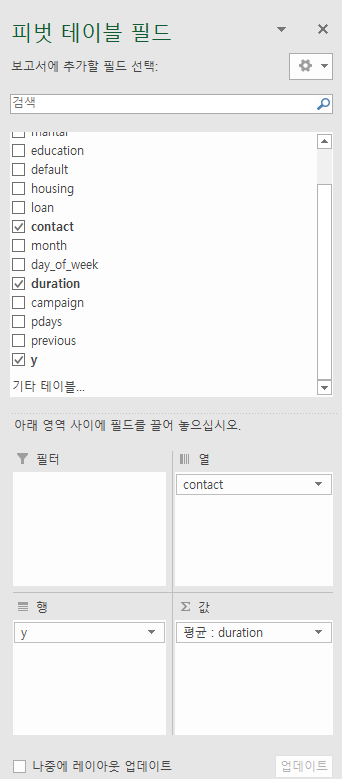

__엑셀에서 피벗테이블을 사용하는 과정__
1. **값**, **행**, **열**영역에 사용할 칼럼을 드래그&드롭한다.    
2. 그리고 값 영역을 클릭하여 값필드설정에 들어간다.   
3. 거기에서 데이터를 요약할 집계함수를 선택한다.  

__파이썬의 피벗테이블 함수__  
pd.pivot_table(데이터프레임, values=**’값’**, index=**’행’**, columns=**’열’**, aggfunc=’집계함수명’)

In [97]:
import pandas as pd
from pandas import DataFrame
from pandas import Series

__피벗테이블 함수 다루기__

In [98]:
pd.pivot_table(df,values='duration',index='y',columns='contact',aggfunc='mean')

contact,cellular,telephone
y,,
no,219.805661,222.469524
yes,516.476512,732.939009


In [99]:
# 데이터프레임 타입으로 반환
pt_type=pd.pivot_table(df,values='duration',index='y',columns='contact',aggfunc='mean')
type(pt_type)

pandas.core.frame.DataFrame

__매개변수 입력없이 피벗테이블 만들기__

In [100]:
pd.pivot_table(df,'duration','y','contact','mean')

contact,cellular,telephone
y,,
no,219.805661,222.469524
yes,516.476512,732.939009


__다중 행 인덱스 설정__

In [101]:
pd.pivot_table(df,'duration',['y','poutcome'],'contact','mean')

contact            cellular   telephone
y   poutcome                           
no  failure      212.936409  196.868421
    nonexistent  220.530431  222.936219
    success      242.067873  230.513514
yes failure      467.413310  464.058824
    nonexistent  581.610024  773.995633
    success      357.270531  444.090909

__다중 열 인덱스 설정__

In [102]:
pd.pivot_table(df,'duration',['y','poutcome'],['job','contact'],'mean')

job                  admin.             blue-collar             entrepreneur  \
contact            cellular   telephone    cellular   telephone     cellular   
y   poutcome                                                                   
no  failure      213.043023  212.939394  215.210458  174.431373   202.717557   
    nonexistent  215.507037  214.493395  233.208344  228.932044   235.242765   
    success      231.548872  156.888889  307.145455  394.600000   233.076923   
yes failure      443.980263  470.615385  599.382353  658.000000   611.636364   
    nonexistent  553.533153  696.462963  723.891176  918.491124   652.289855   
    success      357.891791  452.111111  388.156863  528.500000   382.111111   

job                           housemaid              management              \
contact           telephone    cellular   telephone    cellular   telephone   
y   poutcome                                                                  
no  failure      158.416667  191.185185  409.250000  212.738007  232.470588   
    nonexistent  221.660036  209.855984  227.595361  226.566392  215.069767   
    success      157.000000  321.600000  135.000000  198.458333  286.800000   
yes failure             NaN  456.900000  415.000000  457.692308  370.000000   
    nonexistent  793.666667  571.583333  723.894737  602.965714  642.113636   
    success      704.500000  375.440000  396.000000  353.316667  677.833333   

job              ...    services                 student              \
contact          ...    cellular   telephone    cellular   telephone   
y   poutcome     ...                                                   
no  failure      ...  233.630607  115.481481  198.135135  212.666667   
    nonexistent  ...  218.586311  231.771300  228.919861  241.327044   
    success      ...  228.851852    1.000000  280.310345  240.800000   
yes failure      ...  576.100000  165.000000  435.690476  280.000000   
    nonexistent  ...  657.360000  803.703125  410.551181  594.000000   
    success      ...  358.205128  412.666667  326.720000  357.222222   

job              technician              unemployed                 unknown  \
contact            cellular   telephone    cellular   telephone    cellular   
y   poutcome                                                                  
no  failure      202.017167  207.857143  192.560606  176.888889  231.375000   
    nonexistent  210.853203  220.646516  220.131387  209.393939  194.606557   
    success      226.242424  167.166667  207.200000  126.000000  288.250000   
yes failure      464.904762  466.600000  413.294118  785.000000  247.555556   
    nonexistent  597.989717  754.434783  480.283582  755.352941  651.454545   
    success      363.669231  375.333333  348.000000  350.500000  330.500000   

job                          
contact           telephone  
y   poutcome                 
no  failure      302.000000  
    nonexistent  200.791946  
    success      664.000000  
yes failure             NaN  
    nonexistent  707.272727  
    success             NaN  

[6 rows x 24 columns]

#### 결측값 처리

In [103]:
pd.pivot_table(df,'duration',
               ['y','poutcome'],['job','contact'],
               aggfunc='mean',fill_value=0)

job                  admin.             blue-collar             entrepreneur  \
contact            cellular   telephone    cellular   telephone     cellular   
y   poutcome                                                                   
no  failure      213.043023  212.939394  215.210458  174.431373   202.717557   
    nonexistent  215.507037  214.493395  233.208344  228.932044   235.242765   
    success      231.548872  156.888889  307.145455  394.600000   233.076923   
yes failure      443.980263  470.615385  599.382353  658.000000   611.636364   
    nonexistent  553.533153  696.462963  723.891176  918.491124   652.289855   
    success      357.891791  452.111111  388.156863  528.500000   382.111111   

job                           housemaid              management              \
contact           telephone    cellular   telephone    cellular   telephone   
y   poutcome                                                                  
no  failure      158.416667  191.185185  409.250000  212.738007  232.470588   
    nonexistent  221.660036  209.855984  227.595361  226.566392  215.069767   
    success      157.000000  321.600000  135.000000  198.458333  286.800000   
yes failure        0.000000  456.900000  415.000000  457.692308  370.000000   
    nonexistent  793.666667  571.583333  723.894737  602.965714  642.113636   
    success      704.500000  375.440000  396.000000  353.316667  677.833333   

job              ...    services                 student              \
contact          ...    cellular   telephone    cellular   telephone   
y   poutcome     ...                                                   
no  failure      ...  233.630607  115.481481  198.135135  212.666667   
    nonexistent  ...  218.586311  231.771300  228.919861  241.327044   
    success      ...  228.851852    1.000000  280.310345  240.800000   
yes failure      ...  576.100000  165.000000  435.690476  280.000000   
    nonexistent  ...  657.360000  803.703125  410.551181  594.000000   
    success      ...  358.205128  412.666667  326.720000  357.222222   

job              technician              unemployed                 unknown  \
contact            cellular   telephone    cellular   telephone    cellular   
y   poutcome                                                                  
no  failure      202.017167  207.857143  192.560606  176.888889  231.375000   
    nonexistent  210.853203  220.646516  220.131387  209.393939  194.606557   
    success      226.242424  167.166667  207.200000  126.000000  288.250000   
yes failure      464.904762  466.600000  413.294118  785.000000  247.555556   
    nonexistent  597.989717  754.434783  480.283582  755.352941  651.454545   
    success      363.669231  375.333333  348.000000  350.500000  330.500000   

job                          
contact           telephone  
y   poutcome                 
no  failure      302.000000  
    nonexistent  200.791946  
    success      664.000000  
yes failure        0.000000  
    nonexistent  707.272727  
    success        0.000000  

[6 rows x 24 columns]

__분석주제 #5. 같은 상품을 새로운 고객에게 마케팅 하려고 한다.  
연령과 상품가입여부, 직업을 함께 고려할 때 마케팅 전략을 변화시켜야 할 그룹은?__

#### pivot_table 함수 사용

In [104]:
pt=pd.pivot_table(df,values='age',index='y',columns='job',aggfunc='mean')

In [105]:
pt

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054


#### yes행과 no행의 차 계산

In [106]:
pt.loc['yes']-pt.loc['no']

job
admin.          -0.250911
blue-collar     -0.381430
entrepreneur     0.232030
housemaid        7.945493
management       0.473829
retired          8.327329
self-employed   -2.170175
services        -2.012836
student         -1.596667
technician      -0.853458
unemployed      -0.782328
unknown          1.678627
dtype: float64

In [107]:
# yes행과 no행의 차를 데이터프레임의 새로운 행으로 추가
pt.loc['diff']=pt.loc['yes']-pt.loc['no']

In [108]:
pt

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,38.219846,39.582057,41.703453,44.705451,42.309707,59.926128,40.176887,38.090236,26.396667,38.600033,39.844828,45.375427
yes,37.968935,39.200627,41.935484,52.650943,42.783537,68.253456,38.006711,36.077399,24.800000,37.746575,39.062500,47.054054
diff,-0.250911,-0.381430,0.232030,7.945493,0.473829,8.327329,-2.170175,-2.012836,-1.596667,-0.853458,-0.782328,1.678627


#### diff행 내림차순 정렬

In [110]:
pt=pt.sort_values('diff',axis=1,ascending=False)

In [111]:
pt

job,retired,housemaid,unknown,management,entrepreneur,admin.,blue-collar,unemployed,technician,student,services,self-employed
y,,,,,,,,,,,,
no,59.926128,44.705451,45.375427,42.309707,41.703453,38.219846,39.582057,39.844828,38.600033,26.396667,38.090236,40.176887
yes,68.253456,52.650943,47.054054,42.783537,41.935484,37.968935,39.200627,39.062500,37.746575,24.800000,36.077399,38.006711
diff,8.327329,7.945493,1.678627,0.473829,0.232030,-0.250911,-0.381430,-0.782328,-0.853458,-1.596667,-2.012836,-2.170175


#### diff행 시각화

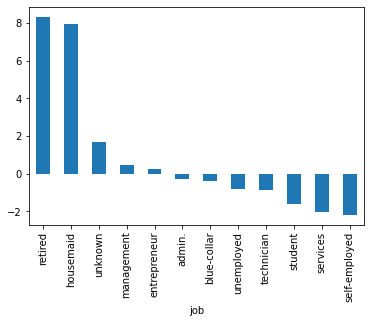

In [112]:
pt.loc['diff'].plot(kind='bar')
plt.show()

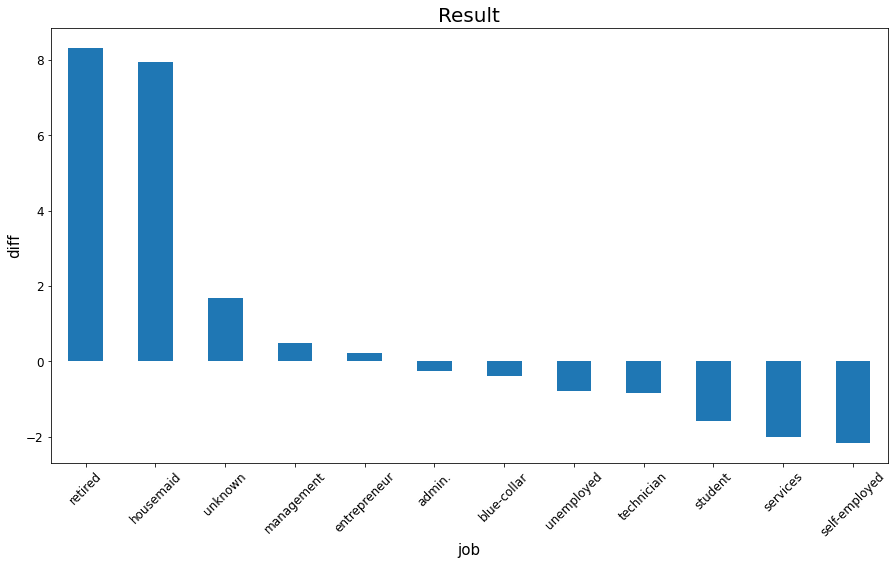

In [113]:
pt.loc['diff'].plot(kind='bar',figsize=[15,8])
plt.title('Result',fontsize=20)
plt.xticks(fontsize=12,rotation=45)
plt.yticks(fontsize=12)
plt.xlabel('job',fontsize=15)
plt.ylabel('diff',fontsize=15)
plt.show()

# 2차 과제

1. 전달드린 데이터를 사용하여 EDA를 진행해보세요

2. 전달드린 데이터를 사용하여 시각화를 진행해보세요  
\- 시각화에 title, xticks,yticks, xlabel을 추가할 것  

2-1. 연령별 히스토그램을 작성해보세요.

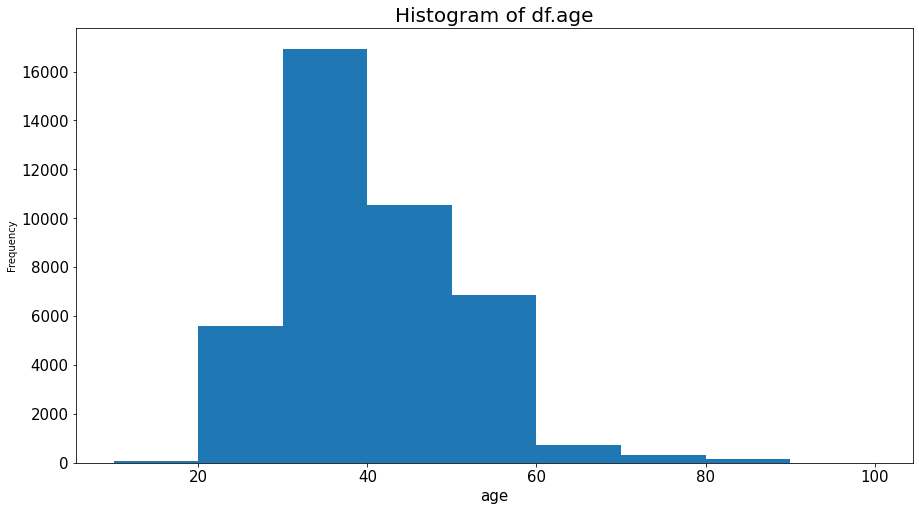

In [115]:
df['age'].plot(kind='hist',bins=[10,20,30,40,50,60,70,80,90,100],figsize=[15,8])
plt.title('Histogram of df.age',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('age',fontsize=15)
plt.show()

2-2. 교육수준(education)별 막대그래프를 작성해보세요.

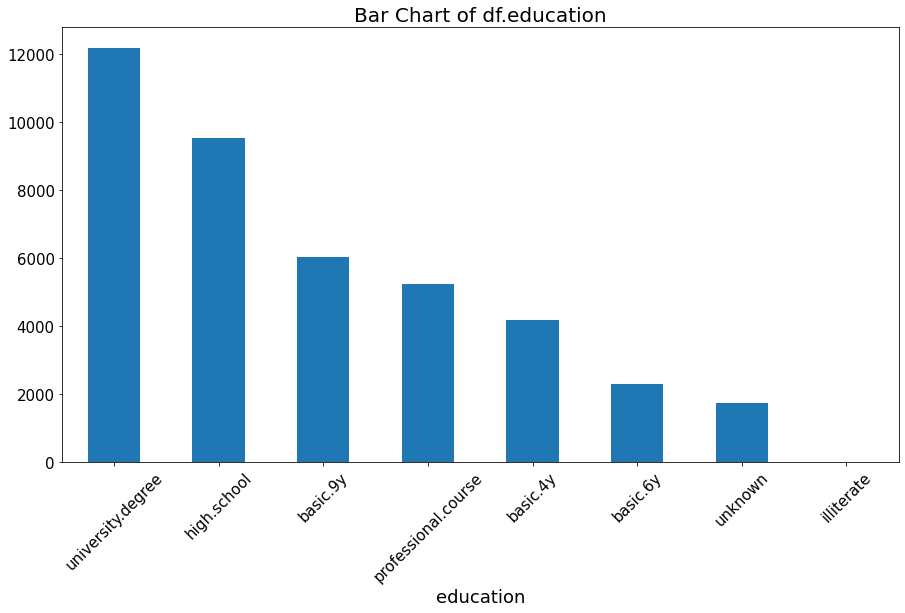

In [123]:
df['education'].value_counts().plot(kind='bar', figsize=[15,8])
plt.title('Bar Chart of df.education', fontsize=20)
plt.xticks(fontsize = 15, rotation = 45)
plt.yticks(fontsize = 15)
plt.xlabel('education', fontsize = 18)
plt.show()

3. groupby 함수를 사용하여 아래의 데이터를 추출해보세요. 

3-1. 요일별 데이터의 수

In [133]:
dayofweek = df.groupby(['day_of_week'])

In [134]:
dayofweek.size()

day_of_week
fri    7827
mon    8514
thu    8623
tue    8090
wed    8134
dtype: int64

3-2. 직업별 연령평균

In [138]:
df.groupby('job')['age'].mean()

job
admin.           38.187296
blue-collar      39.555760
entrepreneur     41.723214
housemaid        45.500000
management       42.362859
retired          62.027326
self-employed    39.949331
services         37.926430
student          25.894857
technician       38.507638
unemployed       39.733728
unknown          45.563636
Name: age, dtype: float64

3-3. 고객과 접촉한 기기별 가장 오래 통화한 시간

In [140]:
df.groupby('contact')['duration'].max()

contact
cellular     3643
telephone    4918
Name: duration, dtype: int64

4. 피벗테이블함수를 사용해보세요


4-1. 피벗테이블함수의 index 매개변수에는 'y'를 사용하고, 다른 매개변수는 자유롭게 입력하여 피벗테이블을 만들어보세요. 

In [150]:
pd.pivot_table(df, values='duration', index = 'y', columns='job', aggfunc ='mean')

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
y,,,,,,,,,,,,
no,215.093385,229.878018,225.632883,218.778826,220.828197,224.263608,222.220912,225.047998,228.851667,213.452021,212.706897,204.559727
yes,517.414201,732.673981,667.540323,535.537736,543.804878,420.235023,622.020134,634.851393,403.316364,553.190411,471.451389,517.756757


4-2. 피벗테이블함수의 index 매개변수에는 'y'를, columns 매개변수에는 여러 열을, 다른 매개변수는 자유롭게 입력하여 피벗테이블을 만들어보세요. 

In [153]:
pd.pivot_table(df, values='age', index = 'y', columns=['job','education'], aggfunc ='mean')

job           admin.                                               \
education   basic.4y   basic.6y   basic.9y high.school illiterate   
y                                                                   
no         48.940299  42.902098  41.000000   37.715982       51.0   
yes        62.700000  44.375000  41.261905   37.746073        NaN   

job                                                        blue-collar  \
education professional.course university.degree    unknown    basic.4y   
y                                                                        
no                  39.219745         37.699391  43.270142   43.402278   
yes                 40.081633         37.142163  43.894737   45.138211   

job                   ...          unemployed                               \
education   basic.6y  ... professional.course university.degree    unknown   
y                     ...                                                    
no         38.825625  ...           40.721311         37.300448  42.214286   
yes        38.457944  ...           40.900000         34.307692  36.600000   

job        unknown                                                        \
education basic.4y   basic.6y   basic.9y high.school professional.course   
y                                                                          
no         49.4375  42.333333  38.766667   42.942857           45.636364   
yes        50.7500  36.000000  58.000000   28.500000           32.000000   

job                                     
education university.degree    unknown  
y                                       
no                39.294118  48.500000  
yes               31.272727  59.470588  

[2 rows x 90 columns]